In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:

# Paths to train and test data
data_dir = 'E:/dog-vs-cat/dogs_vs_cats'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [3]:

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\user\anaconda3\envs\intern_ml\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.5476 - loss: 0.6875

c:\Users\user\anaconda3\envs\intern_ml\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 360s 577ms/step - accuracy: 0.5477 - loss: 0.6875 - val_accuracy: 0.6160 - val_loss: 0.6570
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 276s 441ms/step - accuracy: 0.6224 - loss: 0.6530 - val_accuracy: 0.7006 - val_loss: 0.5709
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.6890 - loss: 0.5923 - val_accuracy: 0.7584 - val_loss: 0.5032
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.7228 - loss: 0.5466 - val_accuracy: 0.7600 - val_loss: 0.4990
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.7328 - loss: 0.5306 - val_accuracy: 0.7964 - val_loss: 0.4308


157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7905 - loss: 0.4365
Test Accuracy: 79.64%


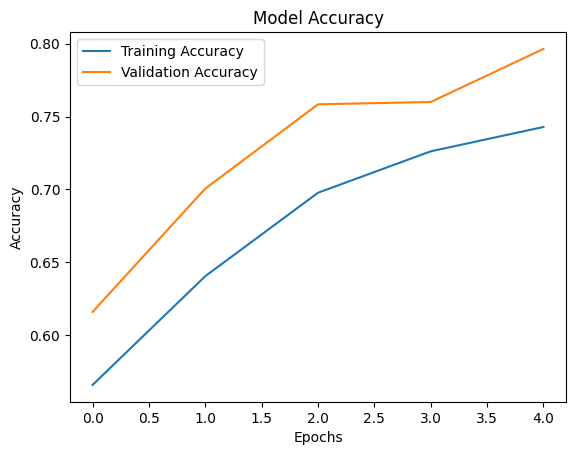

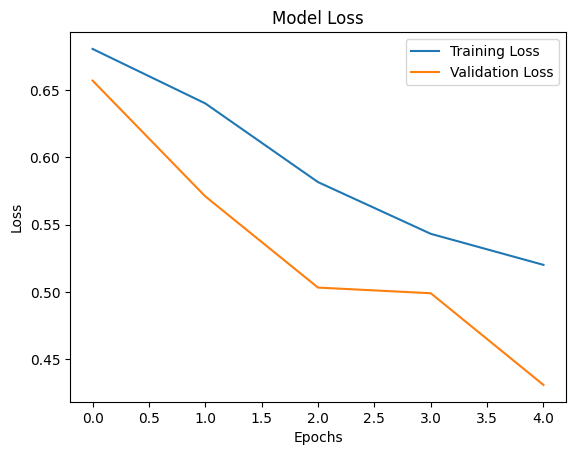

In [6]:

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('dog_cat_classifier_model.h5')
